<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Background_Noise_Focus_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/background_noise_focus_dataset.csv")
data.head(3)

,participant_id,age,role,task_type,background_noise_type,noise_volume_level,focus_duration_minutes,perceived_focus_score,task_completion_quality,mental_fatigue_after_task
0,1,44,Student,Writing,Traffic Noise,8,98,5,5,1
1,2,30,Student,Writing,Silence,9,31,3,9,7
2,3,23,Remote Worker,Reading,Silence,4,39,9,1,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   participant_id             500 non-null    int64 
 1   age                        500 non-null    int64 
 2   role                       500 non-null    object
 3   task_type                  500 non-null    object
 4   background_noise_type      500 non-null    object
 5   noise_volume_level         500 non-null    int64 
 6   focus_duration_minutes     500 non-null    int64 
 7   perceived_focus_score      500 non-null    int64 
 8   task_completion_quality    500 non-null    int64 
 9   mental_fatigue_after_task  500 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 39.2+ KB


In [4]:
data.isna().sum()

,0
participant_id,0
age,0
role,0
task_type,0
background_noise_type,0
noise_volume_level,0
focus_duration_minutes,0
perceived_focus_score,0
task_completion_quality,0
mental_fatigue_after_task,0


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
unique=pd.DataFrame({
    "Columns":data.columns,
    "Unique Values":[data[col].unique() for col in data.columns]
})

print("age:",data['age'].nunique())
#print(data['age'].value_counts())
print("*******************")


print("task_type:",data['task_type'].nunique())
print(data['task_type'].value_counts())
print("*******************")


print("background_noise_type:",data['background_noise_type'].nunique())
print(data['background_noise_type'].value_counts())
print("*******************")


print("noise_volume_level:",data['noise_volume_level'].nunique())
print(data['noise_volume_level'].value_counts())
print("*******************")


print("focus_duration_minutes:",data['focus_duration_minutes'].nunique())
print(data['focus_duration_minutes'].value_counts())
print("*******************")

print("perceived_focus_score:",data['perceived_focus_score'].nunique())
print(data['perceived_focus_score'].value_counts())
print("*******************")


print("task_completion_quality:",data['task_completion_quality'].nunique())
print(data['task_completion_quality'].value_counts())
print("*******************")

print("age:",data['mental_fatigue_after_task'].nunique())
print(data['mental_fatigue_after_task'].value_counts())
print("*******************")

print("role:",data['role'].nunique())
print(data['role'].value_counts())
print("*******************")


age: 34
*******************
task_type: 4
task_type
Writing     136
Studying    130
Coding      127
Reading     107
Name: count, dtype: int64
*******************
background_noise_type: 5
background_noise_type
Traffic Noise         103
Cafe Noise            103
Instrumental Music    103
Silence                97
Songs with Lyrics      94
Name: count, dtype: int64
*******************
noise_volume_level: 10
noise_volume_level
2     57
5     56
4     54
9     52
7     49
10    47
6     47
3     47
1     46
8     45
Name: count, dtype: int64
*******************
focus_duration_minutes: 109
focus_duration_minutes
79    12
30    11
13    10
12     9
94     8
      ..
68     2
62     1
82     1
96     1
15     1
Name: count, Length: 109, dtype: int64
*******************
perceived_focus_score: 10
perceived_focus_score
3     69
1     58
8     55
5     54
9     51
6     49
4     47
2     42
7     41
10    34
Name: count, dtype: int64
*******************
task_completion_quality: 10
task_completion_q

<Figure size 1000x600 with 0 Axes>

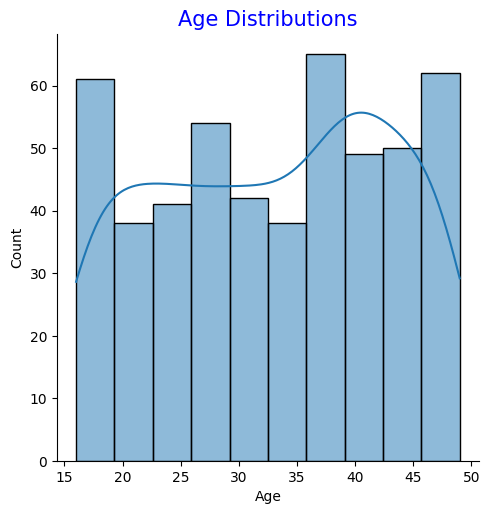

In [8]:
plt.figure(figsize=(10,6))
sns.displot(data=data,x="age",kde=True)
plt.title("Age Distributions",fontsize=15,color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

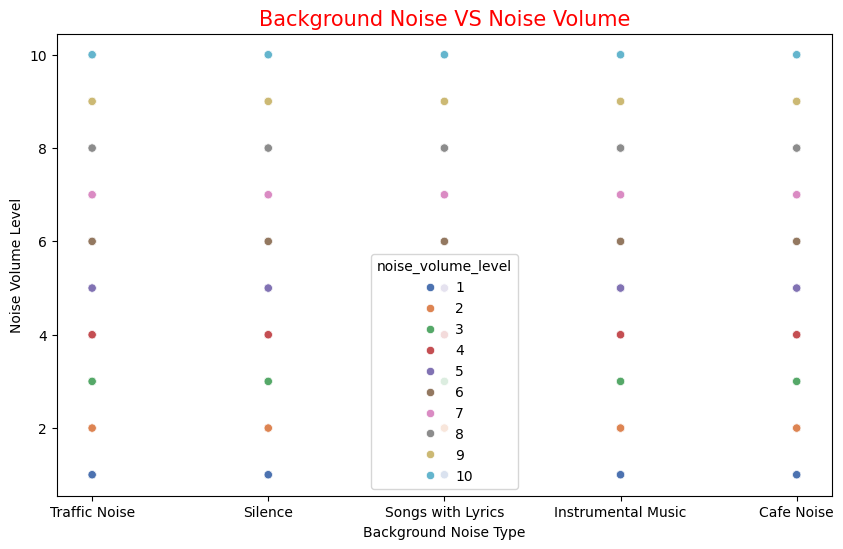

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="background_noise_type",y="noise_volume_level",data=data,hue="noise_volume_level",palette="deep")
plt.title("Background Noise VS Noise Volume",fontsize=15,color="red")
plt.xlabel("Background Noise Type")
plt.ylabel("Noise Volume Level")
plt.show()

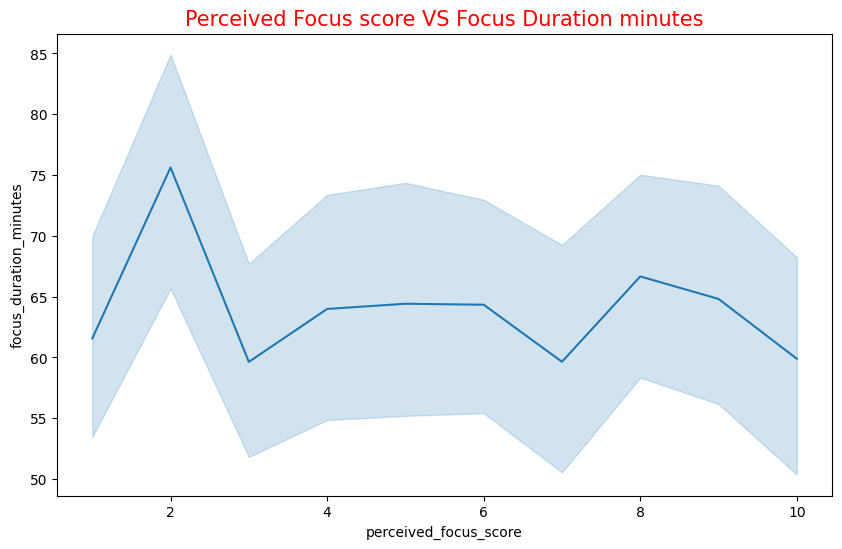

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(x="perceived_focus_score",y="focus_duration_minutes",data=data)
plt.title("Perceived Focus score VS Focus Duration minutes",fontsize=15,color="red")
plt.show()

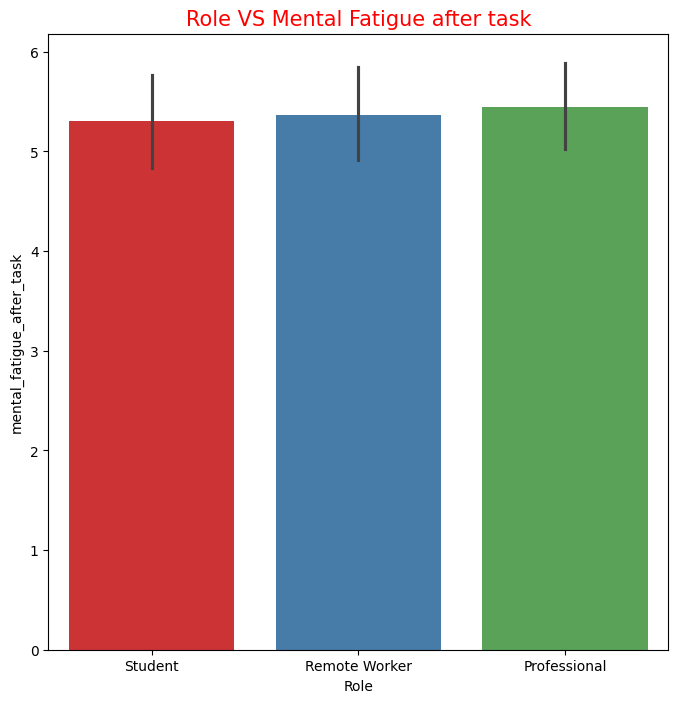

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(x="role",y="mental_fatigue_after_task",data=data,palette="Set1",hue="role")
plt.title("Role VS Mental Fatigue after task",fontsize=15,color="red")
plt.xlabel("Role")
plt.ylabel("mental_fatigue_after_task")
plt.show()

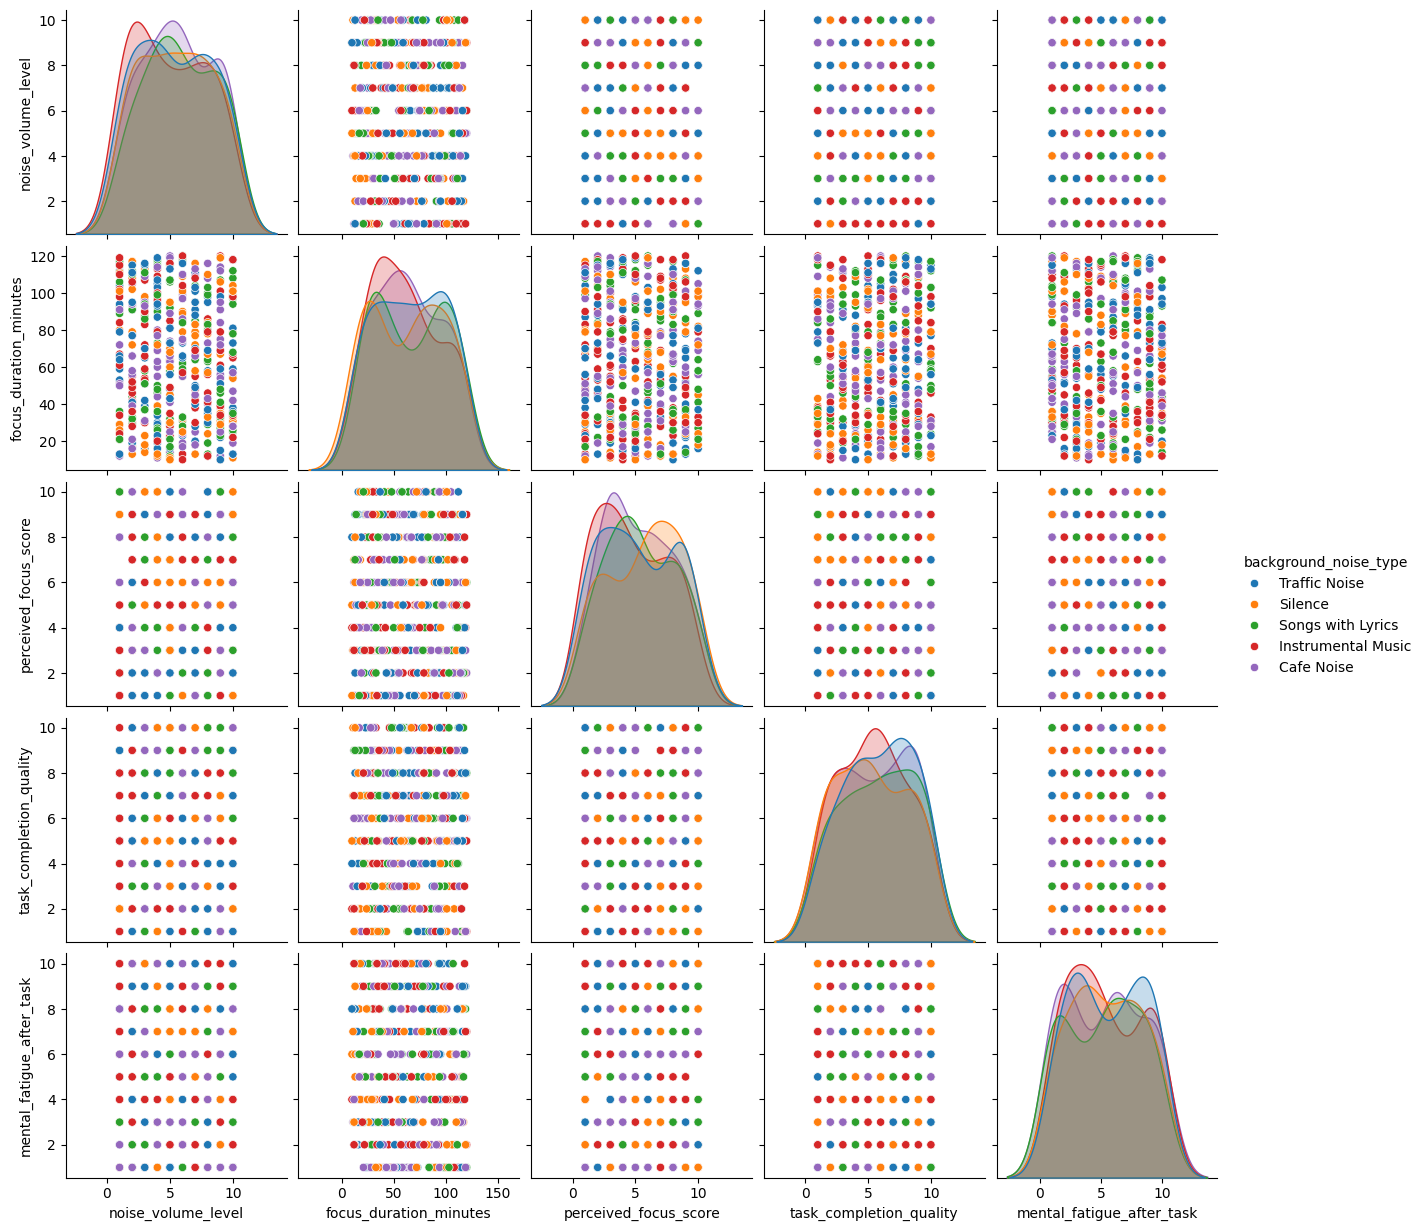

In [12]:
sns.pairplot(data,
             vars=["noise_volume_level",
                 "focus_duration_minutes",
                 "perceived_focus_score",
                 "task_completion_quality",
                 "mental_fatigue_after_task"],
             hue="background_noise_type"
)
plt.show()

**ML**

In [13]:
data['task_type'].unique()

array(['Writing', 'Reading', 'Studying', 'Coding'], dtype=object)

In [14]:
data['task_type']=data['task_type'].map({"Writing":0,"Reading":1,"Studying":2,"Coding":3})

In [15]:
data['role'].unique()

array(['Student', 'Remote Worker', 'Professional'], dtype=object)

In [16]:
data['role']=data['role'].map({"Student":0,"Remote Worker":1,"Professional":2})

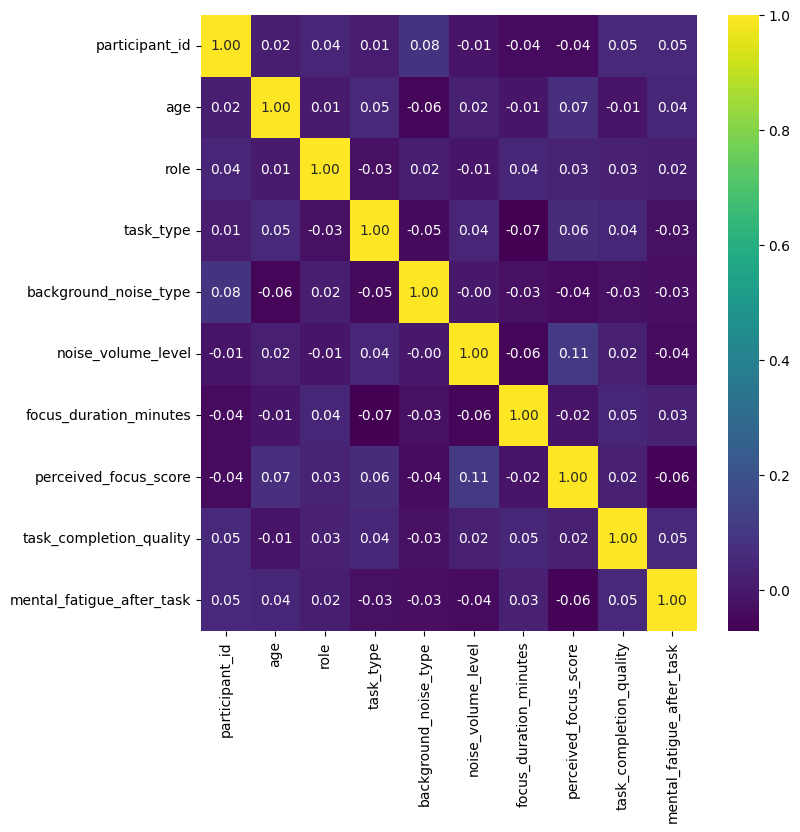

In [41]:
cor=data.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True,cmap="viridis",fmt=".2f")
plt.show()

In [17]:
data['background_noise_type'].unique()

array(['Traffic Noise', 'Silence', 'Songs with Lyrics',
       'Instrumental Music', 'Cafe Noise'], dtype=object)

In [18]:
data['background_noise_type']=data['background_noise_type'].map({"Traffic Noise":0,"Silence":1,"Songs with Lyrics":2,"Instrumental Music":3,"Cafe Noise":4})

In [71]:
from sklearn.model_selection import train_test_split

In [90]:
x=data.drop(["participant_id","mental_fatigue_after_task"],axis=1)
y=data['mental_fatigue_after_task']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 8)
(100, 8)
(400,)
(100,)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [94]:
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred=li.predict(x_test)

In [96]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2.409335517550964
7.936197669943365
-0.03775059430446093


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
ran=RandomForestRegressor()
ran.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
y_pred=ran.predict(x_test)

In [104]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2.5505
8.777143
-0.14771402419091229
